In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hackathon/Train_Data.csv')

# Data Description

 

date: the date on which the ad was made live

campaign: campaign number

adgroup: adgroup number

ad: ad number

impressions - Number of time the ad was shown

clicks - Number of time the ad clicked shown

cost - Amount spent to show ad

conversions - Number of transactions received

revenue: revenue generated from the ad 

In [ ]:
df

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71
...,...,...,...,...,...,...,...,...,...
4566,28-02-2021,campaign 1,adgroup 3,ad 55,19,6,0.07,0,0.00
4567,28-02-2021,campaign 1,adgroup 4,ad 55,1,0,0.00,0,0.00
4568,28-02-2021,campaign 1,adgroup 3,ad 56,16,8,0.12,1,93.20
4569,28-02-2021,campaign 1,adgroup 1,ad 56,37,13,0.23,0,0.00


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


In [ ]:
df.dtypes

date            object
campaign        object
adgroup         object
ad              object
impressions      int64
clicks           int64
cost           float64
conversions      int64
revenue        float64
dtype: object

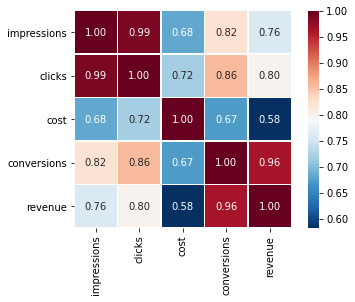

In [ ]:
sns.heatmap(df._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f') 
plt.show()

In [ ]:
df['campaign'].unique()

array(['campaign 1'], dtype=object)

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date           datetime64[ns]
campaign               object
adgroup                object
ad                     object
impressions             int64
clicks                  int64
cost                  float64
conversions             int64
revenue               float64
dtype: object

In [ ]:
df['Day'] = df['date'].dt.day
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

In [ ]:
df.drop(columns=['campaign','date','ad','adgroup'],inplace=True)

In [ ]:
df

,impressions,clicks,cost,conversions,revenue,Day,Month,Year
0,24,6,0.08,0,0.00,8,1,2020
1,1,0,0.00,0,0.00,8,1,2020
2,13,4,0.04,0,0.00,8,1,2020
3,5,4,0.08,0,0.00,8,1,2020
4,247,126,1.29,4,925.71,8,1,2020
...,...,...,...,...,...,...,...,...
4566,19,6,0.07,0,0.00,28,2,2021
4567,1,0,0.00,0,0.00,28,2,2021
4568,16,8,0.12,1,93.20,28,2,2021
4569,37,13,0.23,0,0.00,28,2,2021


In [ ]:
df.isna().sum()

impressions    0
clicks         0
cost           0
conversions    0
revenue        0
Day            0
Month          0
Year           0
dtype: int64

# Raw metrics:

Impressions - Number of time the ad was shown

Clicks - Number of time the ad clicked shown

Cost - Amount spent to show ad

Conversions - Number of transactions received (higher the better)

Revenue - Total value of transactions received (higher the better)

# Efficiency metrics (optional - can be used for creating new features/feature engineering): 

The below features can be newly created/calculated and used while building the models. These are based on raw metrics. 

CTR - Clicks / Impression (higher the better - used to evaluate if the users find the ad relevant)

CPC - Cost / Click (lower the better - used to evaluate if the cost for getting a click)

CPA - Cost / Conversion (lower the better - used to evaluate if the cost for getting a conversion)

ROI - Revenue/Cost (higher the better - used to evaluate the effectiveness of the advertising budget spent

In [ ]:
df['CTR'] = df['clicks']/df['impressions']
df['CPC'] = df['cost']/df['clicks']
df['CPA'] = df['cost']/df['conversions']
# df['ROI'] = df['revenue']/df['cost']

In [ ]:
# df = pd.get_dummies(df,columns=['adgroup'])

In [ ]:
df

,impressions,clicks,cost,conversions,revenue,Day,Month,Year,CTR,CPC,CPA
0,24,6,0.08,0,0.00,8,1,2020,0.250000,0.013333,inf
1,1,0,0.00,0,0.00,8,1,2020,0.000000,NaN,NaN
2,13,4,0.04,0,0.00,8,1,2020,0.307692,0.010000,inf
3,5,4,0.08,0,0.00,8,1,2020,0.800000,0.020000,inf
4,247,126,1.29,4,925.71,8,1,2020,0.510121,0.010238,0.3225
...,...,...,...,...,...,...,...,...,...,...,...
4566,19,6,0.07,0,0.00,28,2,2021,0.315789,0.011667,inf
4567,1,0,0.00,0,0.00,28,2,2021,0.000000,NaN,NaN
4568,16,8,0.12,1,93.20,28,2,2021,0.500000,0.015000,0.1200
4569,37,13,0.23,0,0.00,28,2,2021,0.351351,0.017692,inf


In [ ]:
df.replace([np.inf, -np.inf], np.nan,inplace=True)

In [ ]:
df.isna().sum()

impressions       0
clicks            0
cost              0
conversions       0
revenue           0
Day               0
Month             0
Year              0
CTR               0
CPC             444
CPA            3213
dtype: int64

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
train_X_df = df.drop(columns=['revenue'])
train_Y_df = df['revenue']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor



pipe = Pipeline(steps=[ 
                       ('scaler', RobustScaler()),
                       ('regr', LinearRegression()),
                       ]
                )
                        
param_distributions= [
                      # {
                      #       'scaler': [StandardScaler(),MinMaxScaler(), RobustScaler(), 'passthrough'],
                      #       'regr': [LinearRegression()]
                      # },
                      {
                            'scaler': [StandardScaler(),MinMaxScaler(), RobustScaler(), 'passthrough'],
                            'regr': [DecisionTreeRegressor(criterion='mse',ccp_alpha=0.1,max_depth=5)],
                            'regr__splitter':['best','random'] 
                      },
                       
                      # {
                      #       'scaler': [StandardScaler(),MinMaxScaler(), RobustScaler(), 'passthrough'],
                      #       'regr': [KNeighborsRegressor()],
                      #       'regr__n_neighbors':[5,10,15]    
                      # },
                      # {
                      #       'scaler': [StandardScaler(),MinMaxScaler(), RobustScaler(), 'passthrough'],
                      #       'regr': [Lasso(max_iter=2000,random_state=2021)],
                      #       'regr__alpha':[1,2,3,4,5,6]    
                      # },
                      {
                            # 'scaler': [StandardScaler(),MinMaxScaler(), RobustScaler(), 'passthrough'],
                            'regr': [ExtraTreesRegressor(criterion='mae',max_depth=6,n_estimators=2000,bootstrap=False,ccp_alpha=0.5)],
                             # 'regr__max_depth':[5,6],  
                      },
                      ]
                        

grid_search = GridSearchCV(pipe, param_grid=param_distributions, refit=True, cv=2) 
grid_search.fit(train_X_df, train_Y_df)
print(grid_search.best_params_)

# random_search_cv = RandomizedSearchCV(pipe, param_distributions=param_distributions, n_iter=30, scoring='neg_root_mean_squared_error', refit=True, cv=5, random_state=0) 
# random_search_cv.fit(train_X_df, train_Y_df)
# print(random_search_cv.best_params_)

{'regr': ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.5, criterion='mae',
                    max_depth=6, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=2000, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)}


In [ ]:
best_model = grid_search.best_estimator_
predicted_train_Y = best_model.predict(train_X_df)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_Y_df, predicted_train_Y)

27821.071666539912

In [ ]:
X_test = pd.read_csv('/content/drive/MyDrive/hackathon/Test_Data.csv')
X_test['date'] = pd.to_datetime(X_test['date'])
X_test['Day'] = X_test['date'].dt.day
X_test['Month'] = X_test['date'].dt.month
X_test['Year'] = X_test['date'].dt.year
X_test.drop(columns=['campaign','date','ad','adgroup'],inplace=True)
# X_test = pd.get_dummies(X_test,columns=['adgroup'])
X_test['CTR'] = X_test['clicks']/X_test['impressions']
X_test['CPC'] = X_test['cost']/X_test['clicks']
X_test['CPA'] = X_test['cost']/X_test['conversions'] 
X_test.replace([np.inf, -np.inf], np.nan,inplace=True)
X_test.fillna(0,inplace=True)
X_test

,cost,impressions,clicks,conversions,Day,Month,Year,CTR,CPC,CPA
0,0.58,121,49,1,3,1,2021,0.404959,0.011837,0.58
1,0.17,22,12,0,3,1,2021,0.545455,0.014167,0.00
2,0.05,5,3,0,3,1,2021,0.600000,0.016667,0.00
3,0.01,2,1,0,3,1,2021,0.500000,0.010000,0.00
4,0.01,3,1,0,3,1,2021,0.333333,0.010000,0.00
...,...,...,...,...,...,...,...,...,...,...
313,0.01,1,1,0,15,3,2021,1.000000,0.010000,0.00
314,0.01,5,1,0,15,3,2021,0.200000,0.010000,0.00
315,0.14,25,11,0,15,3,2021,0.440000,0.012727,0.00
316,0.06,9,4,0,15,3,2021,0.444444,0.015000,0.00


In [ ]:
predicted_test_Y = best_model.predict(X_test)

NameError: name 'best_model' is not defined

In [ ]:

pd.DataFrame(predicted_test_Y).to_csv('predicted_test_Y.csv', header=['revenue'], index=False)